# Convergence du calcul

In [1]:
from trustutils import run 

run.introduction('G.F.')
run.description("Cas test periodique, pour tester convergence en maillage des opérateurs de convection.")
run.TRUST_parameters()

## Introduction 
 Validation made by : G.F.



 Report generated 01/02/2022

### Description 
Cas test periodique, pour tester convergence en maillage des opérateurs de convection.

### TRUST parameters 
 * Version TRUST: 1.8.4
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/pas_fini/test_op_conv_vef/build)

In [2]:
from trustutils import run 

list = [10,20,40,80,160]
cas=['amont','muscl','ef_stab','amont_old','centre']

for d in cas:
    for l in list:
        run.addCase("./%s_%d" % (d, l), "cas.data", nbProcs=1)

run.printCases()
run.runCases()
run.executeScript("extract_convergence")

### Test cases 
* amont_10/cas.data : 
* amont_20/cas.data : 
* amont_40/cas.data : 
* amont_80/cas.data : 
* amont_160/cas.data : 
* muscl_10/cas.data : 
* muscl_20/cas.data : 
* muscl_40/cas.data : 
* muscl_80/cas.data : 
* muscl_160/cas.data : 
* ef_stab_10/cas.data : 
* ef_stab_20/cas.data : 
* ef_stab_40/cas.data : 
* ef_stab_80/cas.data : 
* ef_stab_160/cas.data : 
* amont_old_10/cas.data : 
* amont_old_20/cas.data : 
* amont_old_40/cas.data : 
* amont_old_80/cas.data : 
* amont_old_160/cas.data : 
* centre_10/cas.data : 
* centre_20/cas.data : 
* centre_40/cas.data : 
* centre_80/cas.data : 
* centre_160/cas.data : 


Running **with Sserver**...
  => A total of 25 cases were (successfully) run in 4.8s.


## Convergence en maillage en vitesse
### convergence de la convection vitesse en maillage

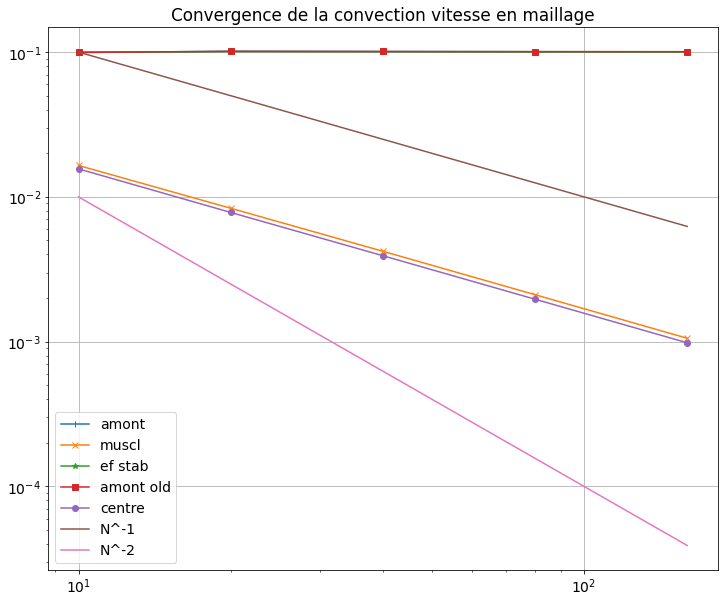

In [3]:
from trustutils import plot
import numpy as np

a = plot.Graph("Convergence de la convection vitesse en maillage")

x,y=plot.loadText("./conv_glob_amont_qdm")
a.add(x,y,label="amont",marker='-|')
x,y=plot.loadText("./conv_glob_muscl_qdm")
a.add(x,y,label="muscl",marker='-x')
x,y=plot.loadText("./conv_glob_ef_stab_qdm")
a.add(x,y,label="ef stab",marker='-*')
x,y=plot.loadText("./conv_glob_amont_old_qdm")
a.add(x,y,label="amont old",marker='-s')
x,y=plot.loadText("./conv_glob_centre_qdm")
a.add(x,y,label="centre",marker='-o')

x=np.linspace(10,160,400)
y=1/x
a.add(x,y,label="N^-1")
x=np.linspace(10,160,400)
y=1/(x*x)
a.add(x,y,label="N^-2")

a.scale(xscale='log',yscale='log')

## Convergence en maillage scalaire
### convergence de la convection T en maillage

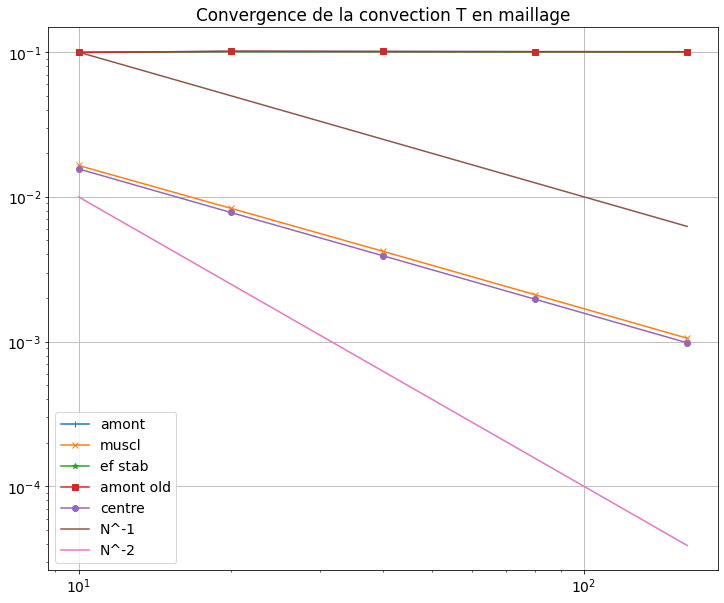

In [4]:
a = plot.Graph("Convergence de la convection T en maillage")

x,y=plot.loadText("./conv_glob_amont_T")
a.add(x,y,label="amont",marker='-|')
x,y=plot.loadText("./conv_glob_muscl_T")
a.add(x,y,label="muscl",marker='-x')
x,y=plot.loadText("./conv_glob_ef_stab_T")
a.add(x,y,label="ef stab",marker='-*')
x,y=plot.loadText("./conv_glob_amont_old_T")
a.add(x,y,label="amont old",marker='-s')
x,y=plot.loadText("./conv_glob_centre_T")
a.add(x,y,label="centre",marker='-o')

x=np.linspace(10,160,400)
y=1/x
a.add(x,y,label="N^-1")
x=np.linspace(10,160,400)
y=1/(x*x)
a.add(x,y,label="N^-2")

a.scale(xscale='log',yscale='log')


## Data Files
### cas

In [5]:
run.dumpDataset("./muscl_10/cas.data") 

 # Test dirchlet entree #
 # PARALLEL OK 8 #
 
 dimension 2
 Domaine dom_canal
 
 # BEGIN MESH #
 Mailler dom_canal
         {
         Pave Cavite
                 {
                 Origine 0. 0.
 	 	 /* Nombre_de_Noeuds  79 79 */  
 	 	 Nombre_de_Noeuds  11 11 
 	 	 Longueurs  6.28318530717959 6.28318530717959
 	 	 }
 
                 {
 	 	 Bord periox   X = 0.                      0. <= Y <= 6.28318530717959
                 Bord periox  X = 6.28318530717959        0. <= Y <= 6.28318530717959    
                 Bord perioy   Y = 0.            	   0. <= X <= 6.28318530717959  
                 Bord perioy   Y = 6.28318530717959        0. <= X <= 6.28318530717959     
 
                 }
         }
 Trianguler_h dom_canal
 # END MESH #
 # BEGIN PARTITION
 Partition dom_canal
 {
         Partition_tool metis { nb_parts 2 }
         Larg_joint 2
         zones_name DOM
 	 Periodique 2 perioy periox
 }
 End
 END PARTITION #
 
 # BEGIN SCATTER 
 Scatter DOM.Zones dom_canal
 END SCAT